# Test cobalt package for balanced dgp

In [2]:
library(ggplot2)
library(gridExtra)

library(cobalt)

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'gridExtra' was built under R version 4.4.2"
Warning message:
"package 'cobalt' was built under R version 4.4.2"
 cobalt (Version 4.5.5, Build Date: 2024-04-02)



## Data

In [3]:
# load data from csv
dgp_name <- "balanced"

df_train <- read.csv(paste0("../dgps/data/", dgp_name, "_train.csv"))
df_test <- read.csv(paste0("../dgps/data/", dgp_name, "_test.csv"))

print(paste0("percentage of treated in train set: ", mean(df_train$D)))
print(paste0("percentage of treated in test set: ", mean(df_test$D)))

head(df_train)

[1] "percentage of treated in train set: 0.4458"
[1] "percentage of treated in test set: 0.4388"


,X1,X2,X3,D,Y,m_oracle,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.3722713,0.5955493,0,1,5.72863869,0.89557467,0.88575728,0.84684685,1.116601,1.00000000,1.128977,1.00000000,1.180851,1.00000000
2,0.4621035,0.7556818,0,0,1.33865480,0.54203186,0.53947716,0.50561798,2.183558,1.18355802,2.171445,1.17144498,2.022727,1.02272727
3,-0.9600463,0.2400384,1,0,2.42771474,0.15974441,0.17662587,0.16339869,1.190114,0.19011407,1.214515,0.21451471,1.195312,0.19531250
4,-0.6075688,0.9346054,1,0,2.38793719,0.16114369,0.18325564,0.19444444,1.192099,0.19209928,1.224373,0.22437332,1.241379,0.24137931
5,-0.5653930,0.3952885,0,0,1.46563010,0.17856877,0.18483935,0.19444444,1.217387,0.21738737,1.226752,0.22675206,1.241379,0.24137931
6,-2.1056469,0.1040103,0,0,-0.03463553,0.01318628,0.01519359,0.02459016,1.013362,0.01336248,1.015428,0.01542799,1.025210,0.02521008


## ATE

### Balance Tables

In [4]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [5]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.1657  -0.0853
X2 Contin. -0.1554   0.0297
X3  Binary  0.0696   0.0287
Y  Contin.  1.9853   0.9509

Effective sample sizes
           Control Treated
Unadjusted 2771.   2229.  
Adjusted    788.48  578.84

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.2465   0.0760
X2 Contin. -0.2081  -0.0287
X3  Binary  0.0608  -0.0076
Y  Contin.  1.9742   1.0410

Effective sample sizes
           Control Treated
Unadjusted 2806.   2194.  
Adjusted    820.21  703.21

### Love Plots

In [6]:

ate_plots_train <- list()
ate_plots_test <- list()

for (i in seq_along(c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"))) {

    weights <- c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(paste0("Train - Weights: ", weights))
    print(bal_table_train)
    print(paste0("Test - Weights: ", weights))
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    ate_plots_train[[i]] <- p_train
    ate_plots_test[[i]] <- p_test
}

[1] "Train - Weights: m_oracle_ate_weights"
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.1657  -0.0853
X2 Contin. -0.1554   0.0297
X3  Binary  0.0696   0.0287
Y  Contin.  1.9853   0.9509

Effective sample sizes
           Control Treated
Unadjusted 2771.   2229.  
Adjusted    788.48  578.84
[1] "Test - Weights: m_oracle_ate_weights"
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.2465   0.0760
X2 Contin. -0.2081  -0.0287
X3  Binary  0.0608  -0.0076
Y  Contin.  1.9742   1.0410

Effective sample sizes
           Control Treated
Unadjusted 2806.   2194.  
Adjusted    820.21  703.21
[1] "Train - Weights: m_hat_ate_weights"
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.1865   0.0015
X2 Contin. -0.1556  -0.0017
X3  Binary  0.0696   0.0133
Y  Contin.  1.9737   1.0135

Effective sample sizes
           Control Treated
Unadjusted 2771.   2229.  
Adjusted    961.78  694.04
[1] "Test - Weights: m_hat_ate_weights"
Balance Measures
      Type Diff.Un Diff.Adj
X

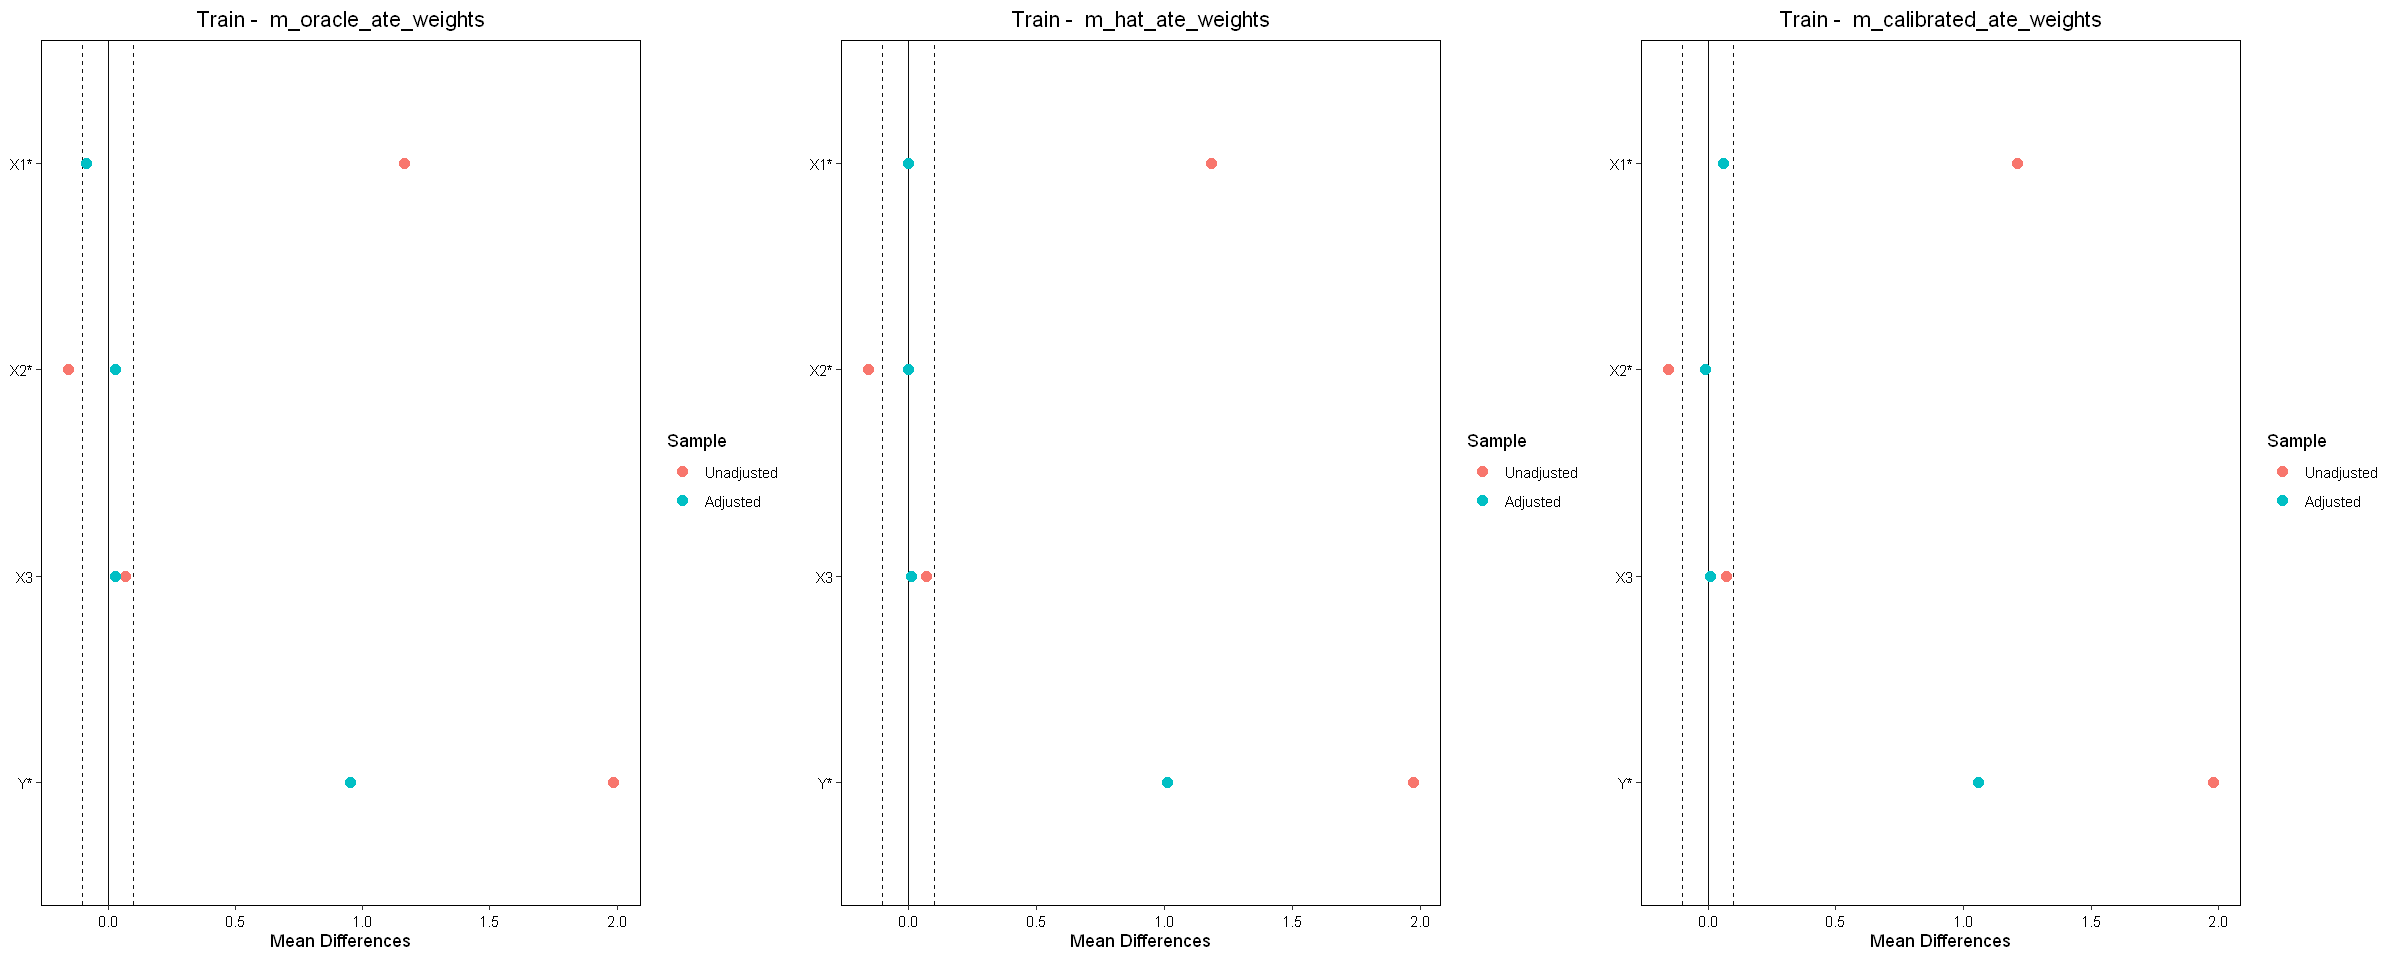

In [7]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_train, nrow = 1, ncol = 3)

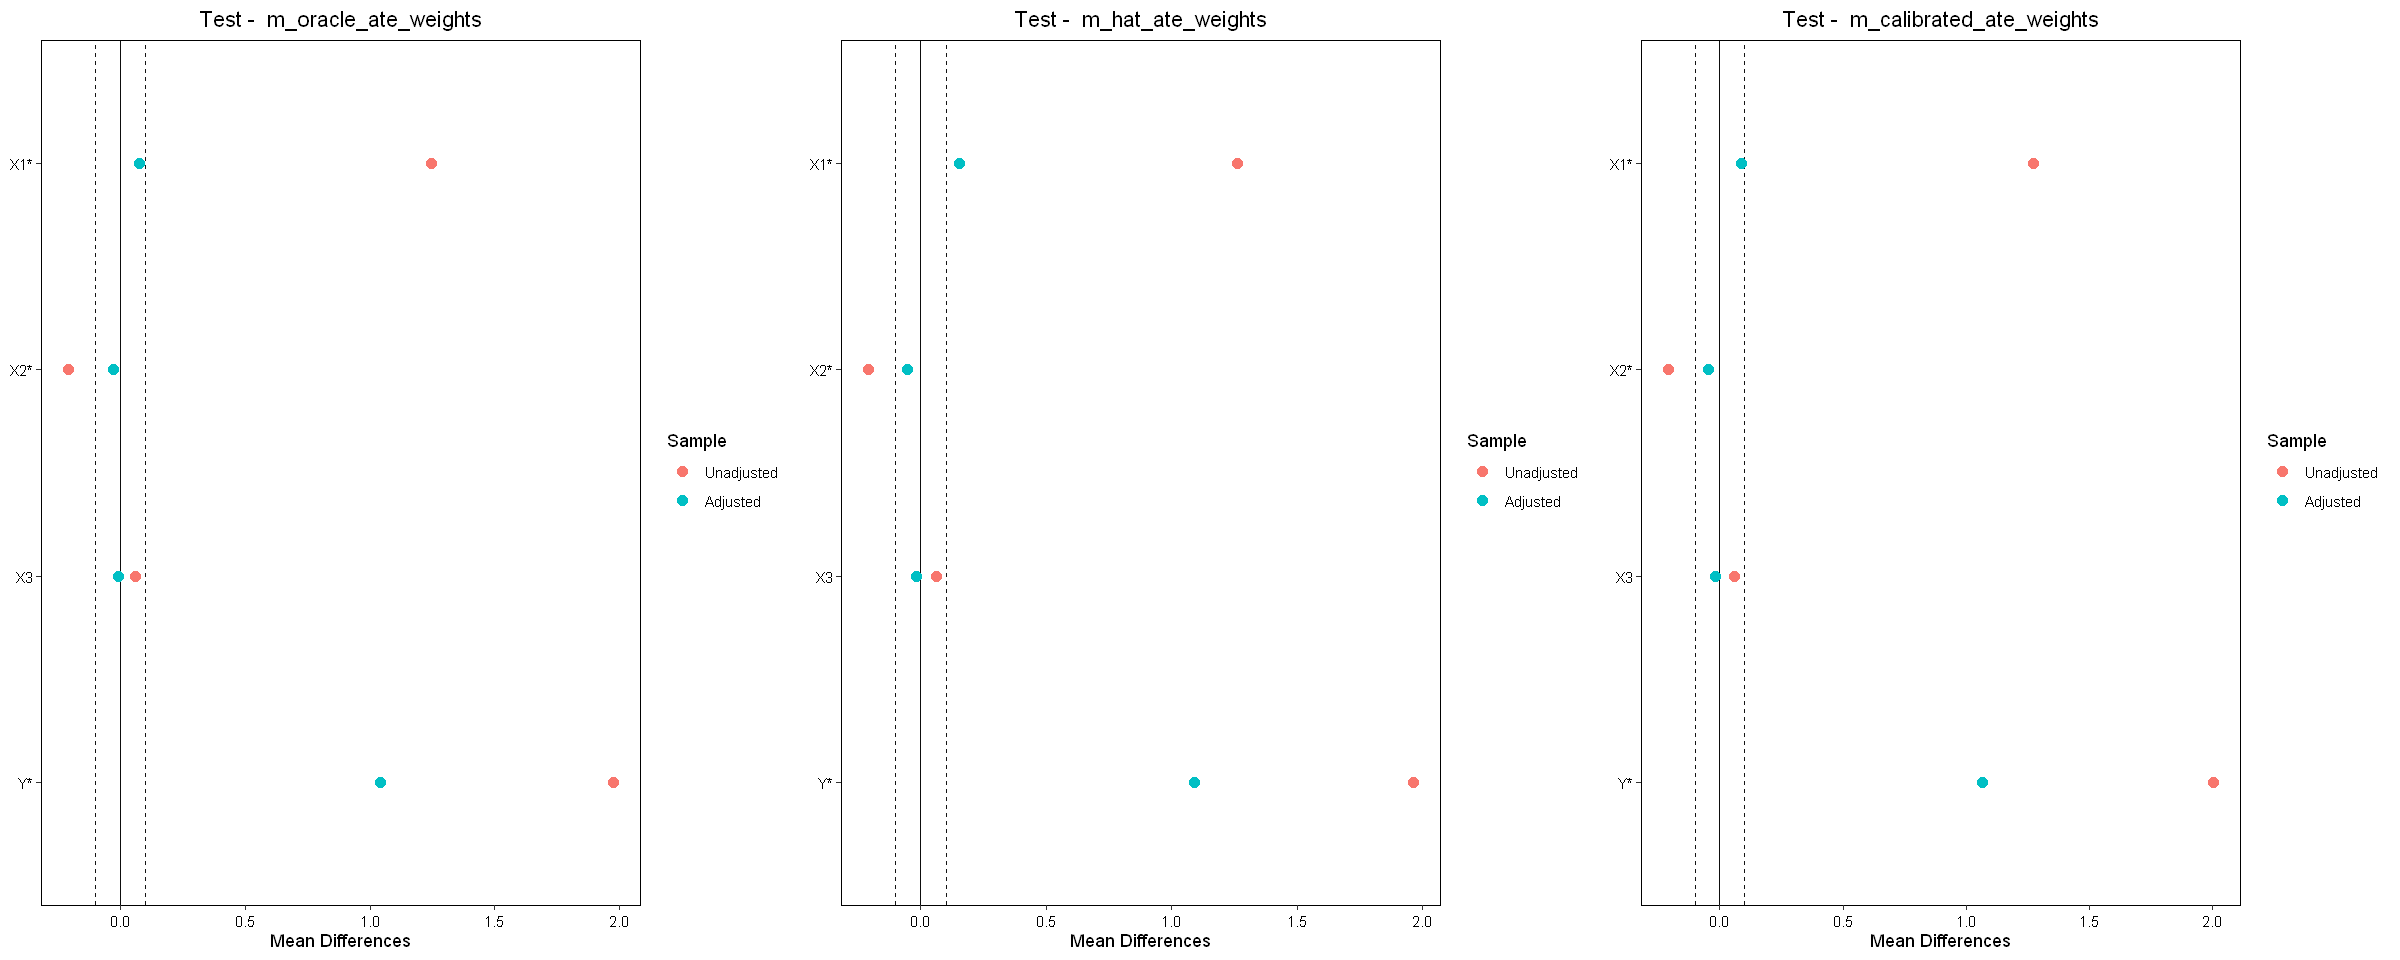

In [8]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_test, nrow = 1, ncol = 3)

## ATT

### Balance Tables

In [9]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [10]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.4651  -0.1016
X2 Contin. -0.1557   0.1243
X3  Binary  0.0696   0.0574
Y  Contin.  2.3035   1.1388

Effective sample sizes
           Control Treated
Unadjusted 2771.      2229
Adjusted    215.36    2229

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5430   0.0024
X2 Contin. -0.2114   0.0275
X3  Binary  0.0608   0.0112
Y  Contin.  2.2687   1.1232

Effective sample sizes
           Control Treated
Unadjusted 2806.      2194
Adjusted    213.66    2194

### Love Plots

In [11]:
att_plots_train <- list()
att_plots_test <- list()

for (i in seq_along(c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"))) {

    weights <- c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    att_plots_train[[i]] <- p_train
    att_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.4651  -0.1016
X2 Contin. -0.1557   0.1243
X3  Binary  0.0696   0.0574
Y  Contin.  2.3035   1.1388

Effective sample sizes
           Control Treated
Unadjusted 2771.      2229
Adjusted    215.36    2229
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5430   0.0024
X2 Contin. -0.2114   0.0275
X3  Binary  0.0608   0.0112
Y  Contin.  2.2687   1.1232

Effective sample sizes
           Control Treated
Unadjusted 2806.      2194
Adjusted    213.66    2194
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.4694  -0.0272
X2 Contin. -0.1560   0.0888
X3  Binary  0.0696   0.0392
Y  Contin.  2.2680   1.1700

Effective sample sizes
           Control Treated
Unadjusted 2771.      2229
Adjusted    269.29    2229
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5429   0.0713
X2 Contin. -0.2110   0.0020
X3  Binary  0.0608  -0.0023
Y  Contin.  2.2416   1.1559

Effective sample sizes
           Control Treated
Unadju

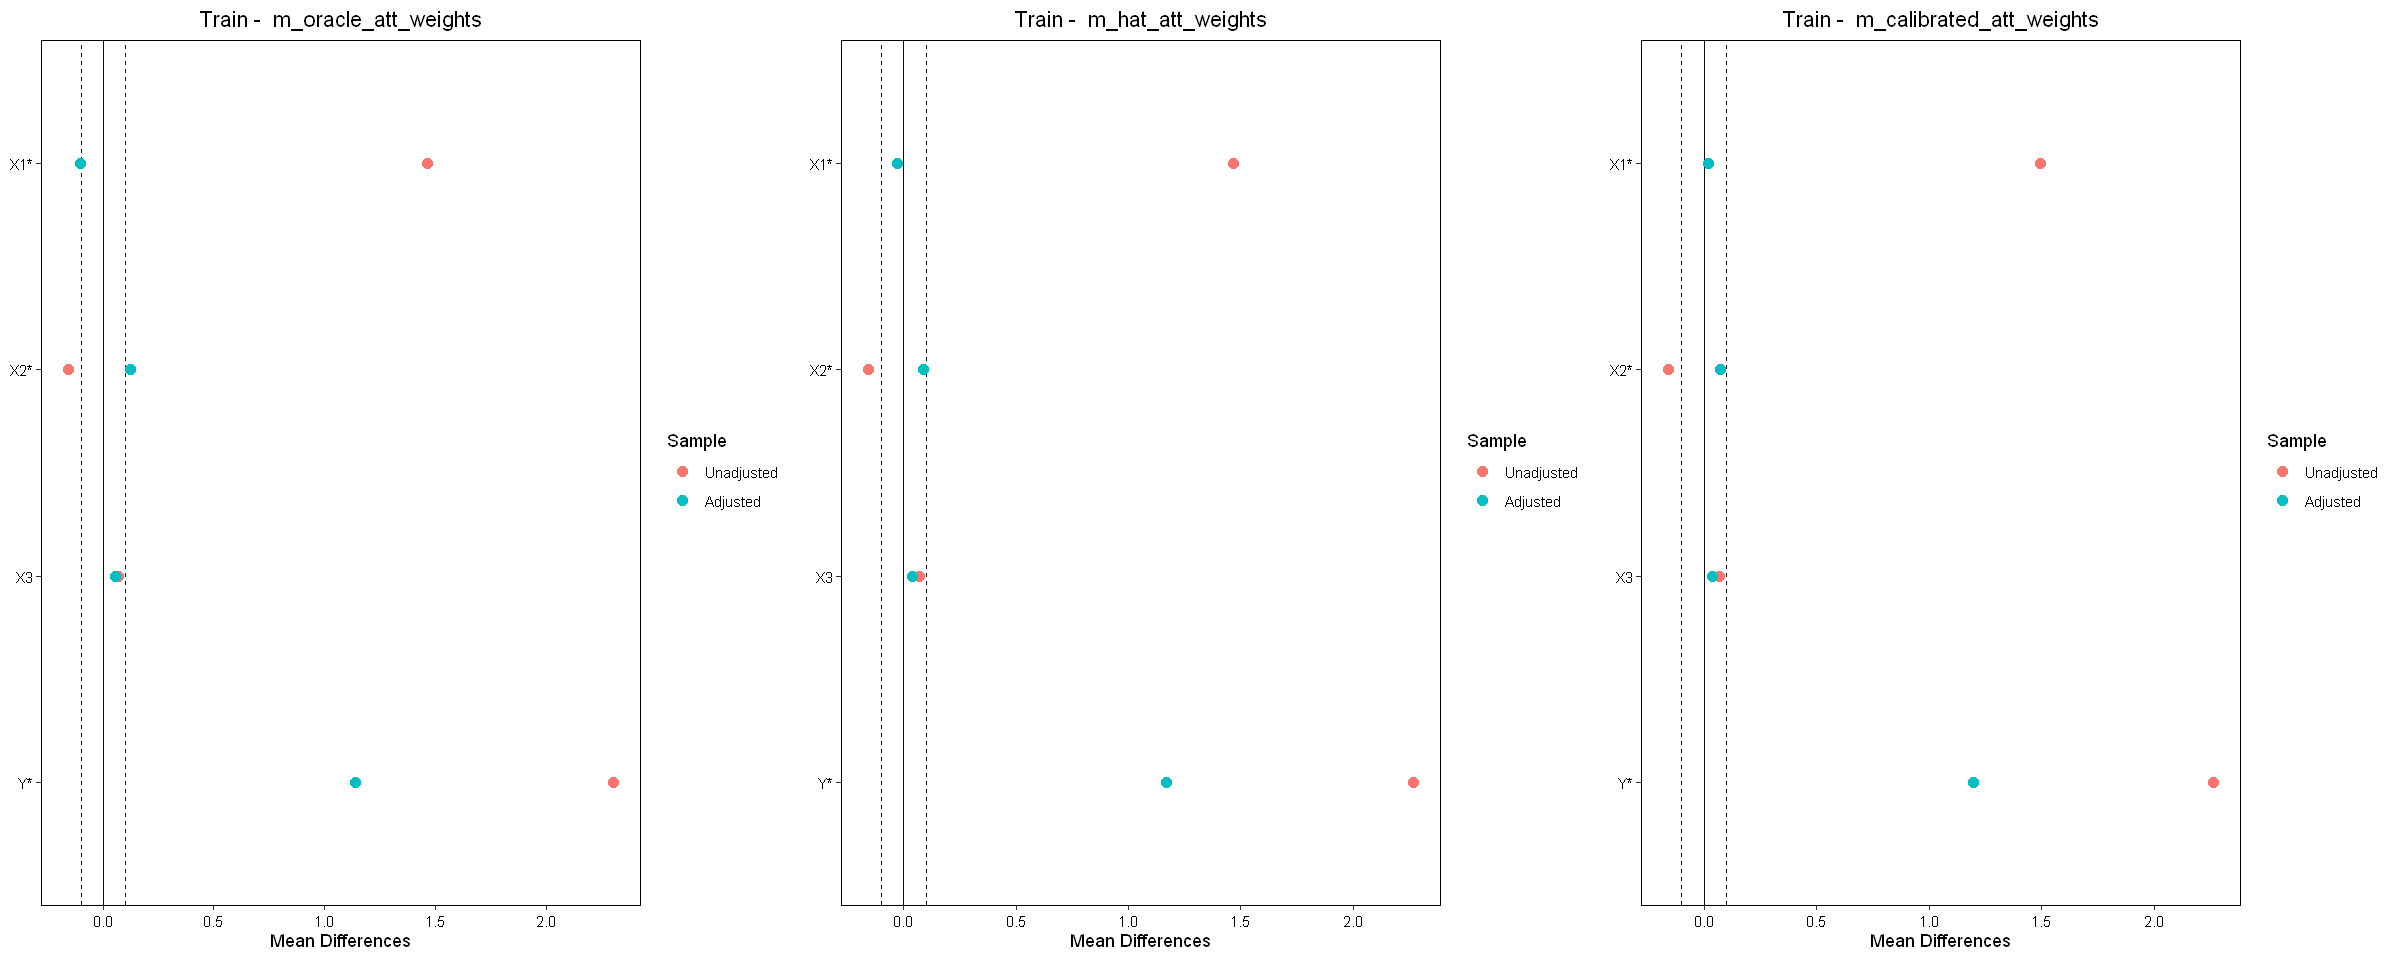

In [12]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = att_plots_train, nrow = 1, ncol = 3)

## Additional Balance plots

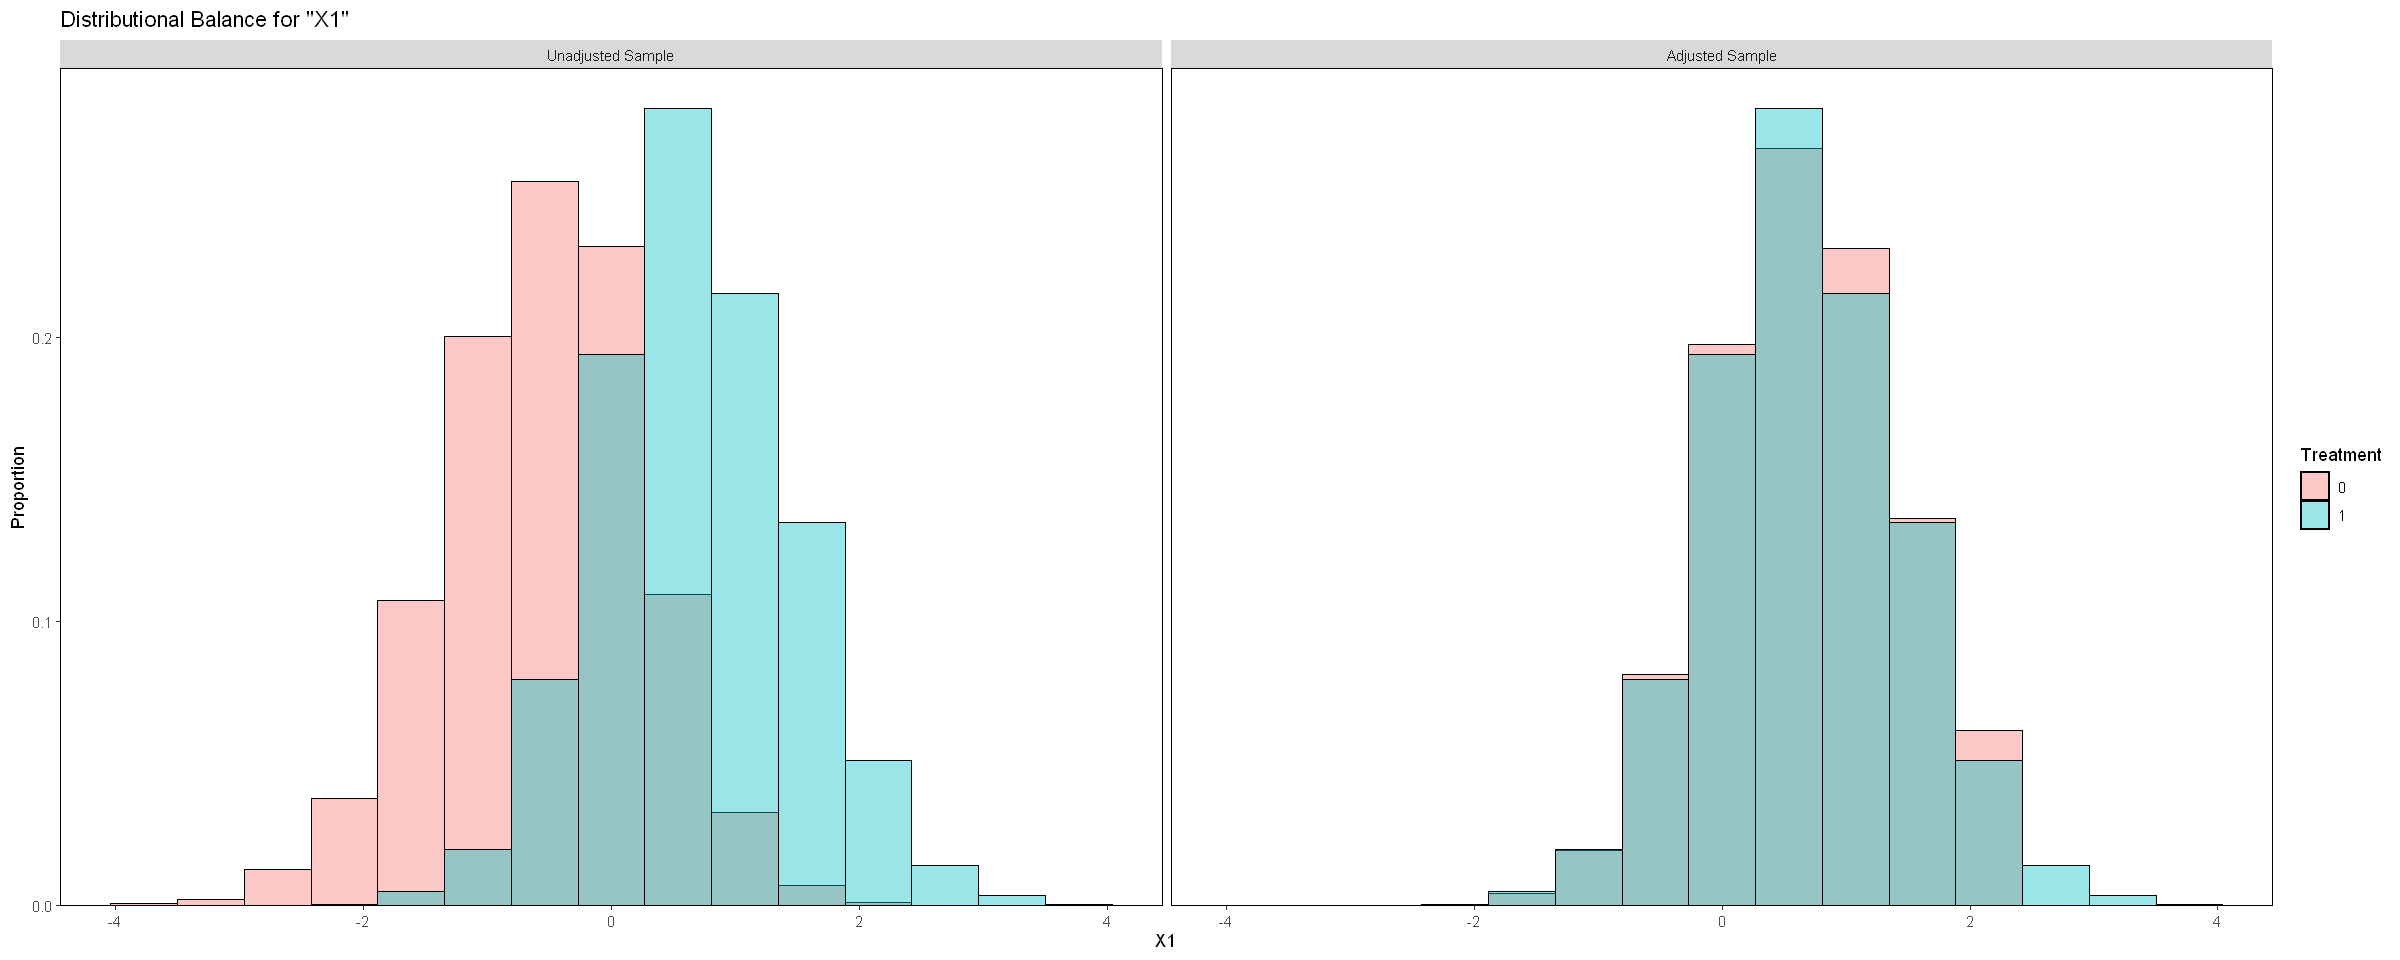

In [17]:
bal.plot(
    x=formula,
    var.name="X1",
    data=df_test,
    weights=weights,
    which="both",
    type = "histogram",
    mirror = FALSE,
    bins = 15)

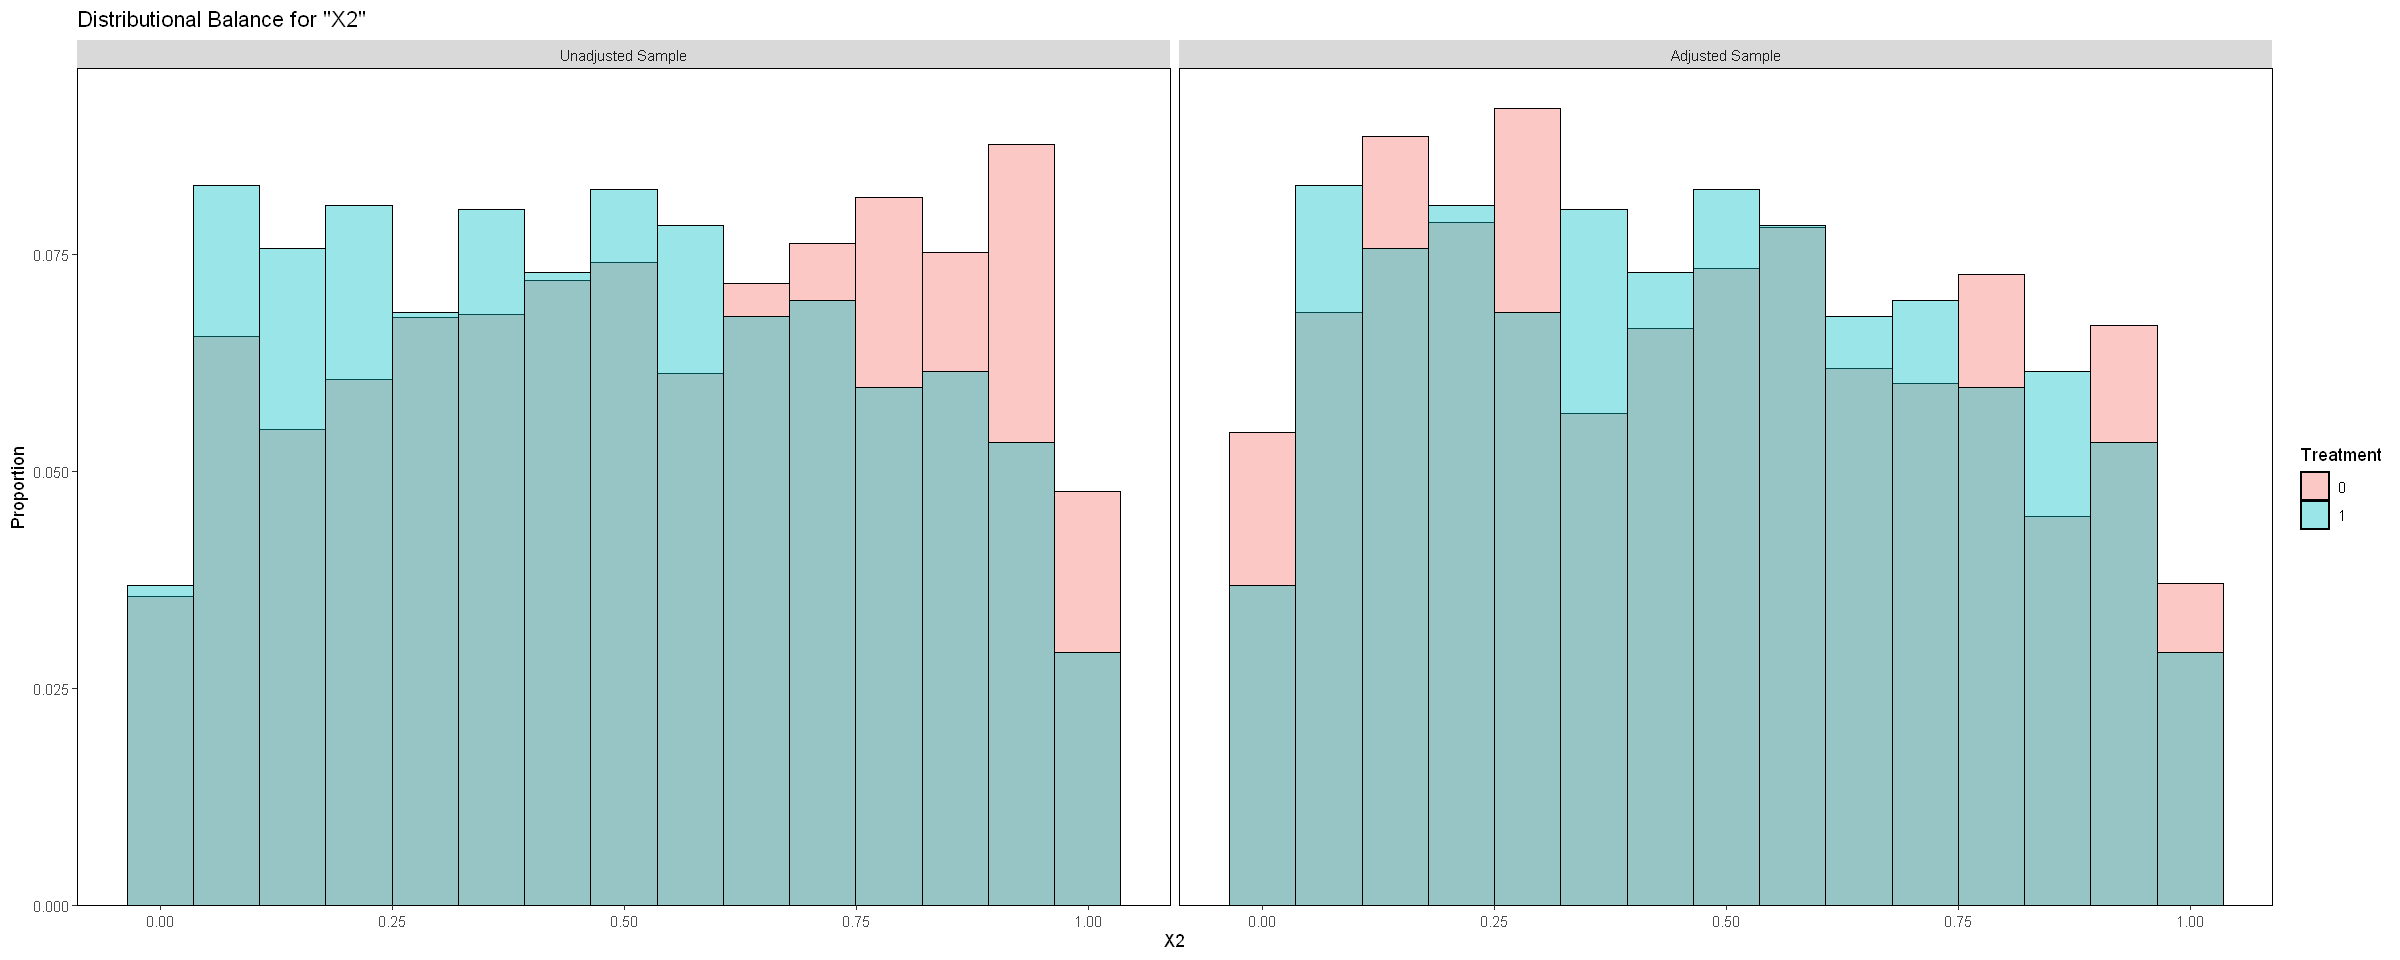

In [20]:
bal.plot(
    x=formula,
    var.name="X2",
    data=df_test,
    weights=weights,
    which="both",
    type = "histogram",
    mirror = FALSE,
    bins = 15)

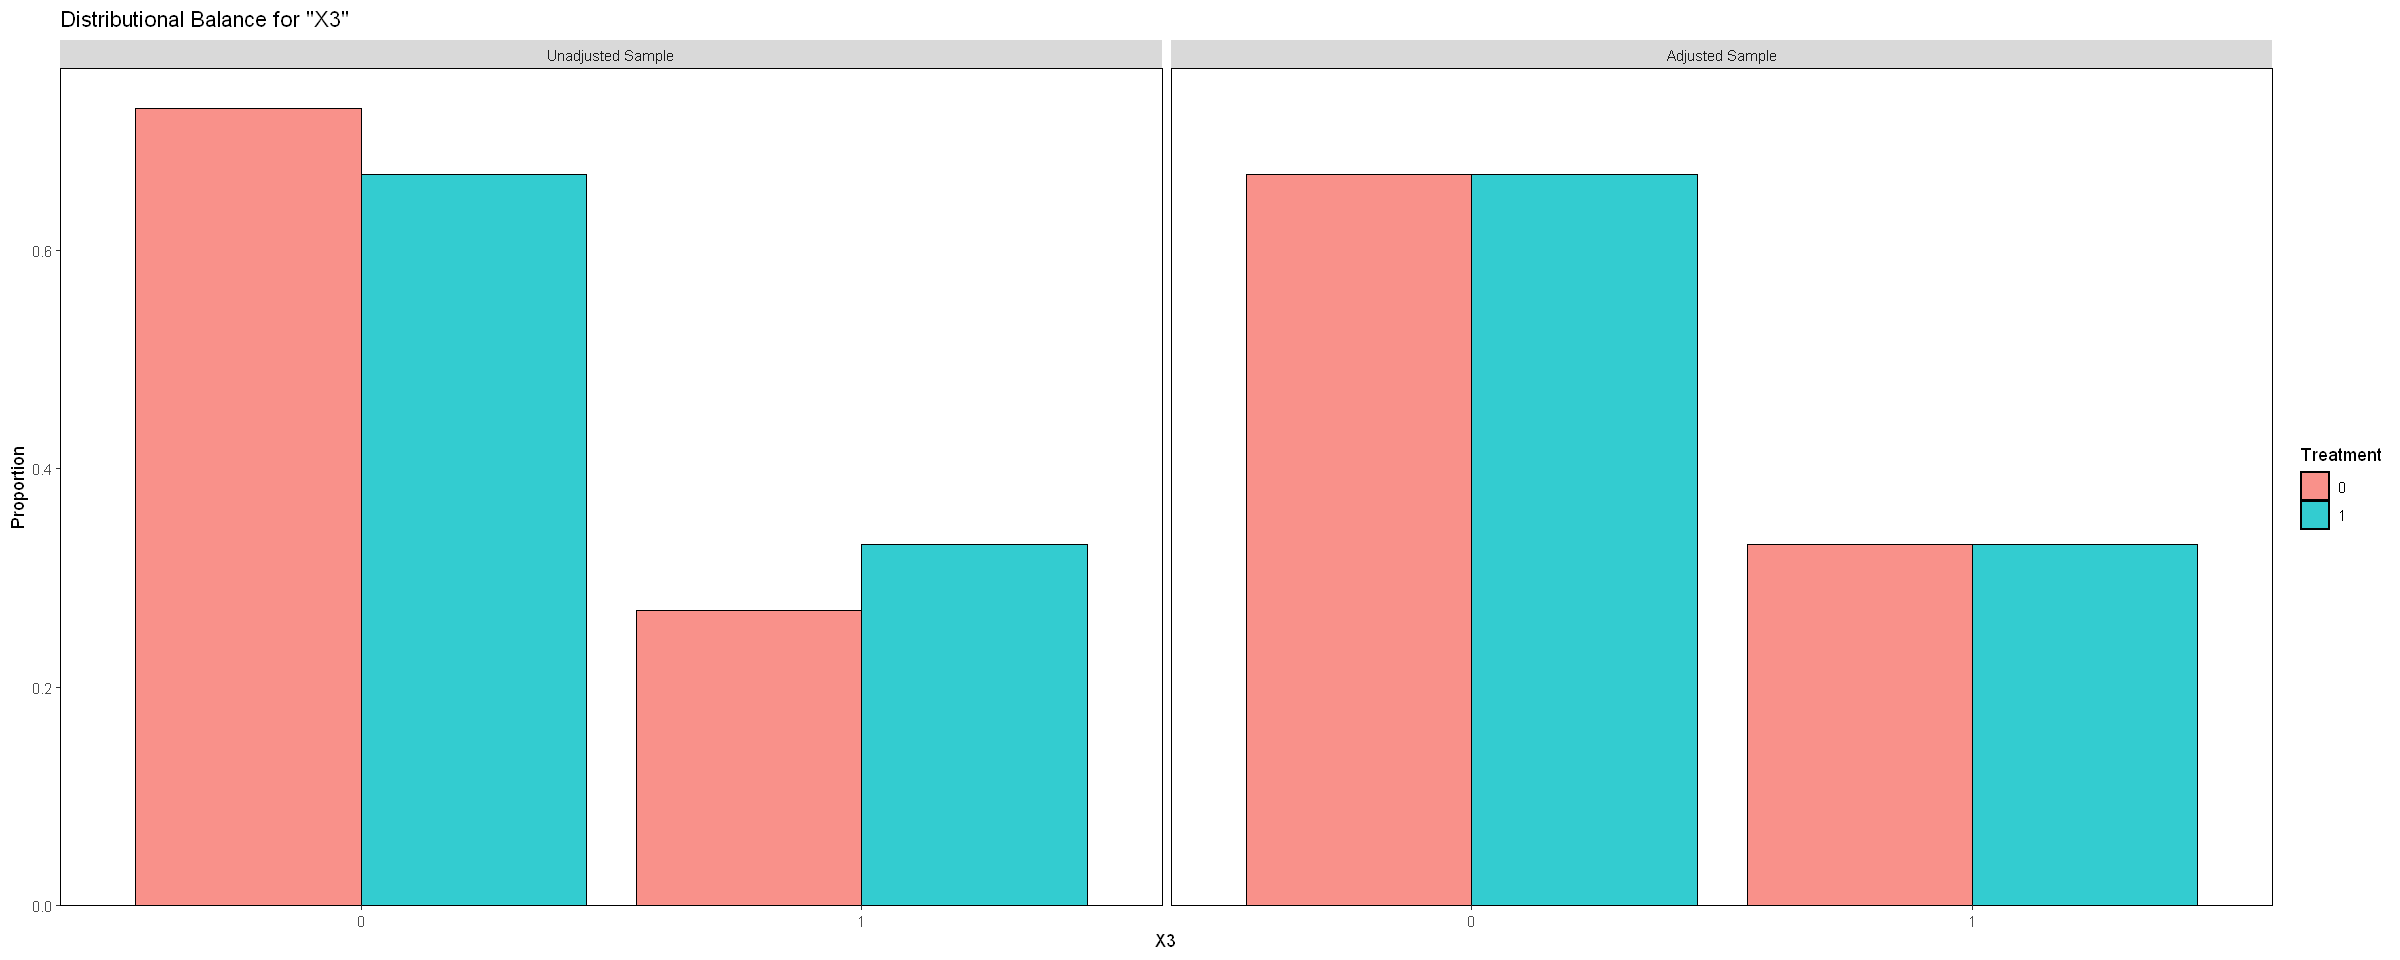

In [19]:
bal.plot(
    x=formula,
    var.name="X3",
    data=df_test,
    weights=weights,
    which="both",
    type = "histogram")